In [1]:
import pandas as pd
import numpy as np

In [2]:
db = pd.read_csv(r"C:\Users\laksh\VITC_Projects\2. NIDS_Prediction\Total_CSVs\NIDS_Dataset.csv")

In [3]:
db.head()

,Unnamed: 0,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,0,1,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,1,0,0,0,0,0,0,1,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,2,0,0,0,0,0,0,1,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,3,0,0,0,0,0,0,1,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,4,0,0,0,0,0,0,1,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign


In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from imblearn.combine import SMOTEENN

In [6]:
db = db.iloc[:,1:46]
db = db.iloc[:,0:45]

In [7]:
db

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [8]:
x1 = db.iloc[:,0:45]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [9]:
x1 = db.iloc[:,0:44]
y1 = db.iloc[:,44]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time
0,0,0,0,0,0,0,1,0,0,0,...,1.562871,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178
1,0,0,0,0,0,0,1,0,0,0,...,-2.909475,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056
2,0,0,0,0,0,0,1,0,0,0,...,-0.381118,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369
3,0,0,0,0,0,0,1,0,0,0,...,0.617898,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256
4,0,0,0,0,0,0,1,0,0,0,...,0.428250,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,-0.616616,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881
269639,1,0,0,0,0,0,0,0,0,0,...,1.499615,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549
269640,1,0,0,0,0,0,0,0,0,0,...,-0.889490,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937
269641,1,0,0,0,0,0,0,0,0,0,...,-0.665595,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511


In [10]:
np.isnan(x1).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [11]:
y1.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Benign, dtype: object

In [12]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x1,y1)

In [13]:
X_resampled.count()

ip_1                    473122
ip_144                  473122
ip_204                  473122
ip_205                  473122
ip_207                  473122
ip_8                    473122
not_freq                473122
ip_4                    473122
ip_11                   473122
dest_ip_130_1_8         473122
not_dest_freq           473122
Wrong_port              473122
port_is_443             473122
Wrong_port.1            473122
destination_port_443    473122
Duration                473122
fs_1807                 473122
fs_more                 473122
fsless                  473122
FlowSentRate            473122
FlowRecvRate            473122
Pcket_lenVar            473122
Length_std              473122
Length_mean             473122
L_median                473122
L_mode                  473122
s_median                473122
s_mode                  473122
PLCV                    473122
PTV                     473122
PT_std                  473122
PT_mean                 473122
PT_media

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,random_state=42)

In [15]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [16]:
x_train.shape

(378497, 44)

In [17]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="Adagrad",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")

    

print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.6017 - accuracy: 0.7581
Epoch 2/50
2957/2957 [==============================] - 15s 5ms/step - loss: 0.3318 - accuracy: 0.9181
Epoch 3/50
2957/2957 [==============================] - 15s 5ms/step - loss: 0.1991 - accuracy: 0.9442
Epoch 4/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.1519 - accuracy: 0.9549
Epoch 5/50
2957/2957 [==============================] - 15s 5ms/step - loss: 0.1306 - accuracy: 0.9578
Epoch 6/50
2957/2957 [==============================] - 15s 5ms/step - loss: 0.1181 - accuracy: 0.9595
Epoch 7/50
2957/2957 [==============================] - 15s 5ms/step - loss: 0.1095 - accuracy: 0.9615
Epoch 8/50
2957/2957 [==============================] - 15s 5ms/step - loss: 0.1016 - accuracy: 0.9641
Epoch 9/50
2957/2957 [==============================] - 15s 5ms/step - loss: 0.0959 - accuracy: 0.9662
Epoch 10/50
2957/2957 [==============================] - 15s 5ms/step - l

In [18]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [19]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [20]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [21]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

2958/2958 [==============================] - 8s 3ms/step - loss: 0.0519 - accuracy: 0.9819


In [22]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 98.2515037059784
Test accuracy: 98.19498062133789


In [23]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

2958/2958 [==============================] - 7s 2ms/step


In [24]:
y_pred = pd.get_dummies(y_classes)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     48236
           1       0.98      0.98      0.98     46389

   micro avg       0.98      0.98      0.98     94625
   macro avg       0.98      0.98      0.98     94625
weighted avg       0.98      0.98      0.98     94625
 samples avg       0.98      0.98      0.98     94625



In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
y_test_le = le.fit_transform(y_test)

In [28]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [29]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [30]:
from matplotlib import pyplot

In [31]:
print(auc_keras)

0.9819090794925767


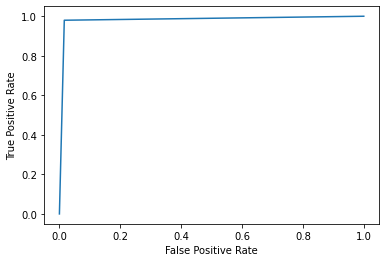

In [32]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [33]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="Adam",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")

    

print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0714 - accuracy: 0.9751
Epoch 2/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.0545 - accuracy: 0.9809
Epoch 3/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.0525 - accuracy: 0.9818
Epoch 4/50
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0508 - accuracy: 0.9818
Epoch 5/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.0500 - accuracy: 0.9821
Epoch 6/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.0491 - accuracy: 0.9825
Epoch 7/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.0487 - accuracy: 0.9825
Epoch 8/50
2957/2957 [==============================] - 16s 6ms/step - loss: 0.0478 - accuracy: 0.9829
Epoch 9/50
2957/2957 [==============================] - 16s 5ms/step - loss: 0.0478 - accuracy: 0.9830
Epoch 10/50
2957/2957 [==============================] - 16s 5ms/step - l

In [34]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [35]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [36]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [37]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

2958/2958 [==============================] - 7s 2ms/step - loss: 0.0427 - accuracy: 0.9840


In [38]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 98.46366047859192
Test accuracy: 98.4000027179718


In [39]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

2958/2958 [==============================] - 6s 2ms/step


In [40]:
y_pred = pd.get_dummies(y_classes)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     48236
           1       0.98      0.98      0.98     46389

   micro avg       0.98      0.98      0.98     94625
   macro avg       0.98      0.98      0.98     94625
weighted avg       0.98      0.98      0.98     94625
 samples avg       0.98      0.98      0.98     94625



In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
y_test_le = le.fit_transform(y_test)

In [44]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [45]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [46]:
from matplotlib import pyplot

In [49]:
print(auc_keras)

0.9839996797329025


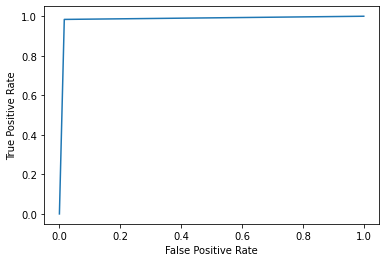

In [50]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [51]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="RMSProp",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")

    

print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
2957/2957 [==============================] - 19s 6ms/step - loss: 0.0678 - accuracy: 0.9764
Epoch 2/50
2957/2957 [==============================] - 19s 7ms/step - loss: 0.0544 - accuracy: 0.9810
Epoch 3/50
2957/2957 [==============================] - 18s 6ms/step - loss: 0.0529 - accuracy: 0.9815
Epoch 4/50
2957/2957 [==============================] - 19s 6ms/step - loss: 0.0522 - accuracy: 0.9817
Epoch 5/50
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0517 - accuracy: 0.9821
Epoch 6/50
2957/2957 [==============================] - 18s 6ms/step - loss: 0.0521 - accuracy: 0.9815
Epoch 7/50
2957/2957 [==============================] - 18s 6ms/step - loss: 0.0519 - accuracy: 0.9817
Epoch 8/50
2957/2957 [==============================] - 18s 6ms/step - loss: 0.0519 - accuracy: 0.9822
Epoch 9/50
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0522 - accuracy: 0.9819
Epoch 10/50
2957/2957 [==============================] - 17s 6ms/step - l

In [52]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [53]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [54]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [55]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

2958/2958 [==============================] - 8s 3ms/step - loss: 0.0550 - accuracy: 0.9818


In [56]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 98.2094943523407
Test accuracy: 98.18229675292969


In [57]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

2958/2958 [==============================] - 7s 2ms/step


In [58]:
y_pred = pd.get_dummies(y_classes)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     48236
           1       0.98      0.98      0.98     46389

   micro avg       0.98      0.98      0.98     94625
   macro avg       0.98      0.98      0.98     94625
weighted avg       0.98      0.98      0.98     94625
 samples avg       0.98      0.98      0.98     94625



In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
y_test_le = le.fit_transform(y_test)

In [62]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [63]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [64]:
from matplotlib import pyplot

In [65]:
print(auc_keras)

0.9818659959893705


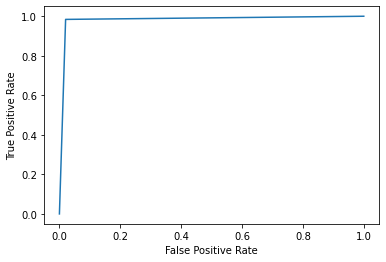

In [66]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [67]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="Adam",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=100,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")

    

print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/100
2957/2957 [==============================] - 19s 6ms/step - loss: 0.0712 - accuracy: 0.9749
Epoch 2/100
2957/2957 [==============================] - 18s 6ms/step - loss: 0.0544 - accuracy: 0.9808
Epoch 3/100
2957/2957 [==============================] - 18s 6ms/step - loss: 0.0522 - accuracy: 0.9810
Epoch 4/100
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0509 - accuracy: 0.9819
Epoch 5/100
2957/2957 [==============================] - 18s 6ms/step - loss: 0.0496 - accuracy: 0.9821
Epoch 6/100
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0494 - accuracy: 0.9823
Epoch 7/100
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0482 - accuracy: 0.9827
Epoch 8/100
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0480 - accuracy: 0.9827
Epoch 9/100
2957/2957 [==============================] - 17s 6ms/step - loss: 0.0478 - accuracy: 0.9830
Epoch 10/100
2957/2957 [==============================] - 18s 6m

In [68]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [69]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))


In [70]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [71]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

2958/2958 [==============================] - 8s 3ms/step - loss: 0.0410 - accuracy: 0.9851


In [72]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 98.59126806259155
Test accuracy: 98.50885272026062


In [73]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

2958/2958 [==============================] - 7s 2ms/step


In [74]:
y_pred = pd.get_dummies(y_classes)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     48236
           1       0.99      0.98      0.98     46389

   micro avg       0.99      0.99      0.99     94625
   macro avg       0.99      0.99      0.99     94625
weighted avg       0.99      0.99      0.99     94625
 samples avg       0.99      0.99      0.99     94625



In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
y_test_le = le.fit_transform(y_test)

In [78]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [79]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [80]:
from matplotlib import pyplot

In [81]:
print(auc_keras)

0.9850248373561499


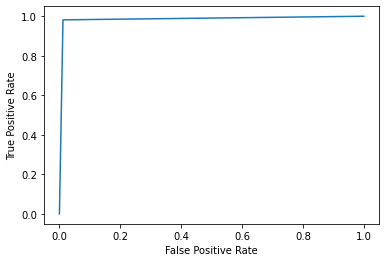

In [82]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [ ]:
cnn.save("NIDS.h5")